In [2]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import sys

In [3]:
boston = datasets.load_boston()
data = np.array(boston.data)
target = np.array(boston.target)#.reshape((len(boston.target),1))

In [4]:
boston.data[1:5]

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [105]:
def setting_data(data=None):#,target=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [6]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [7]:
def feature_derivative(feature=None, errors=None):
    return 2*np.dot(feature,errors)

In [118]:
def gradient_descent(data=None, target=None,tolerance_gradient=0.01, tolerance_cost=0.0000001, step_size = 0.001):
    feature_matrix = setting_data(data=data)#, target=target)
    weights = np.ones(np.ma.size(data,axis=1)+1)
    partials = np.zeros(np.ma.size(data,axis=1)+1)
    
    i = 1
    prev_cost = sys.maxsize
    costs = np.array([])
    gradients = np.array([])
    
    converged = False
    while not converged:
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, target)
        
        #Updating weights
        
        #taking derivative
        partials = 2* np.dot(feature_matrix.T,errors)
        weights = np.subtract(weights,np.multiply(step_size,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
        gradients = np.append(gradients,gradient_magnitude)
        costs = np.append(costs,cur_cost)
#         print(gradient_magnitude)
        
#         print("difference of costs: " + str(abs(cur_cost - prev_cost)))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost) or i > 100000:
            converged = True
        prev_cost = cur_cost
#         print("gradient magnitude")
#         print(gradient_magnitude)
#         print(cur_cost)
#         print(weights,i)
        i += 1
    return (i, weights,gradients, costs)

In [129]:
iterations, learned_weights, gradients, costs = gradient_descent(data=data, target=target,step_size=0.0000000001,tolerance_cost=0.00001,tolerance_gradient=0.00001)
print(iterations, learned_weights, gradients, costs)

100002 [ 0.99329139  0.48406284  0.18812288  0.83497859  1.00277871  0.99546406
  0.99829912 -0.04771757  0.93766225  0.9257726  -0.09467633  0.81892561
  0.03093177  0.38140786] [5.13602437e+08 4.97332962e+08 4.81578865e+08 ... 5.97159011e+04
 5.97155364e+04 5.97151717e+04] [4.16798681e+08 3.90837737e+08 3.66495481e+08 ... 6.69945282e+04
 6.69941716e+04 6.69938150e+04]


In [126]:
feature_matrix = setting_data(data=data)
predicted = predict_values(feature_matrix=feature_matrix, weights=learned_weights)
print(predicted[1:7].format())
print(target[1:7])

[23.95894166 23.49611891 24.17108827 24.91854252 23.83729845 23.12782478]
[21.6 34.7 33.4 36.2 28.7 22.9]


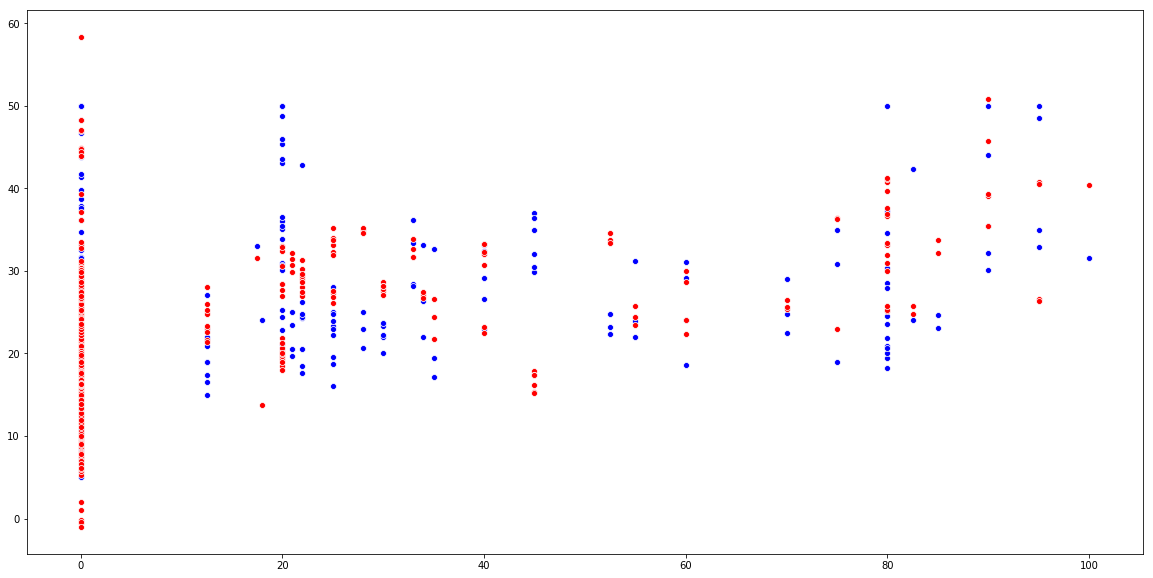

In [123]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data[:,1],y=target,color='b')
sns.scatterplot(x=data[:,1],y=predicted,color='r')

In [121]:
iterations, learned_weights, gradients, costs = gradient_descent(data=data, target=target,step_size=0.0000000001,tolerance_cost=0.00001,tolerance_gradient=0.00001)
print(iterations, learned_weights, gradients, costs)

100002 [ 0.99329139  0.48406284  0.18812288  0.83497859  1.00277871  0.99546406
  0.99829912 -0.04771757  0.93766225  0.9257726  -0.09467633  0.81892561
  0.03093177  0.38140786] [5.13602437e+08 4.97332962e+08 4.81578865e+08 ... 5.97159011e+04
 5.97155364e+04 5.97151717e+04] [4.16798681e+08 3.90837737e+08 3.66495481e+08 ... 6.69945282e+04
 6.69941716e+04 6.69938150e+04]


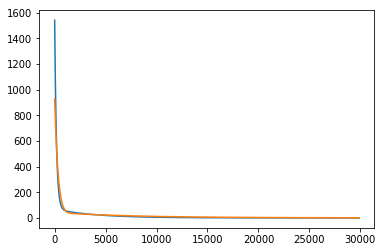

In [111]:
sns.lineplot(x=range(iterations-1),y=costs)
sns.lineplot(x=range(iterations-1),y=gradients)


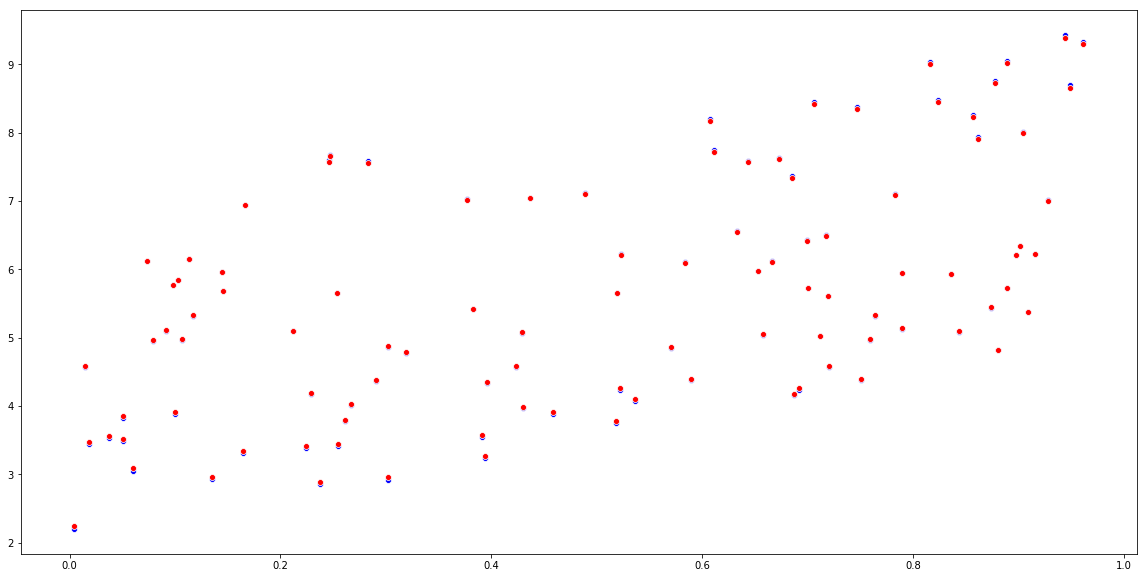

In [117]:
plt.figure(figsize=(20,10))
feature_matrix = setting_data(data=x)
predicted = predict_values(feature_matrix=feature_matrix, weights=learned_weights)
sns.scatterplot(x=x[:,0],y=y,color='b')
sns.scatterplot(x=x[:,0],y=predicted,color='r')

In [65]:
a = np.array([])
a = np.append(a,100)
a

array([100.])

In [98]:
q = np.random.rand(200).reshape(200,1)
p = (2) + (3)*q[:,0]
len(p)

200

In [93]:
x = np.random.rand(200).reshape(100,2)
y = (2) + (3)*x[:,0] + (5)*x[:,1]

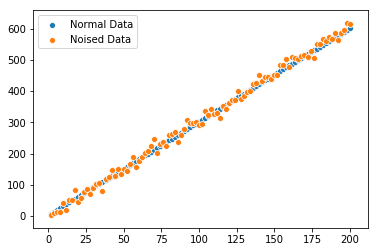

In [142]:
x = np.arange(1,201,1).reshape(100,2)
y = (2) + (3)*x[:,1]
y_noise = y + 15 * np.random.randn(*y.shape)
sns.scatterplot(x[:,1],y,label='Normal Data')
sns.scatterplot(x[:,1],y_noise,label='Noised Data')

In [143]:
iterations, learned_weights, gradients, costs = gradient_descent(data=x, target=y,step_size=0.0000000001,tolerance_cost=0.00001,tolerance_gradient=0.00001)
print(iterations, learned_weights, gradients, costs)

17758 [1.00403007 1.50727781 1.51130787] [3.87064333e+06 3.86856343e+06 3.86648464e+06 ... 3.16289765e+02
 3.16158843e+02 3.16028007e+02] [1.39420000e+06 1.39270221e+06 1.39120604e+06 ... 1.54330394e+02
 1.54330384e+02 1.54330374e+02]


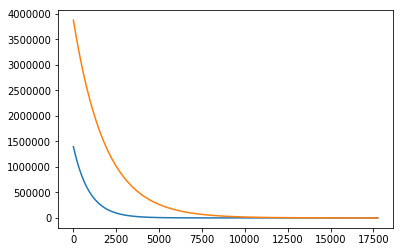

In [144]:
sns.lineplot(x=range(iterations-1),y=costs)
sns.lineplot(x=range(iterations-1),y=gradients)

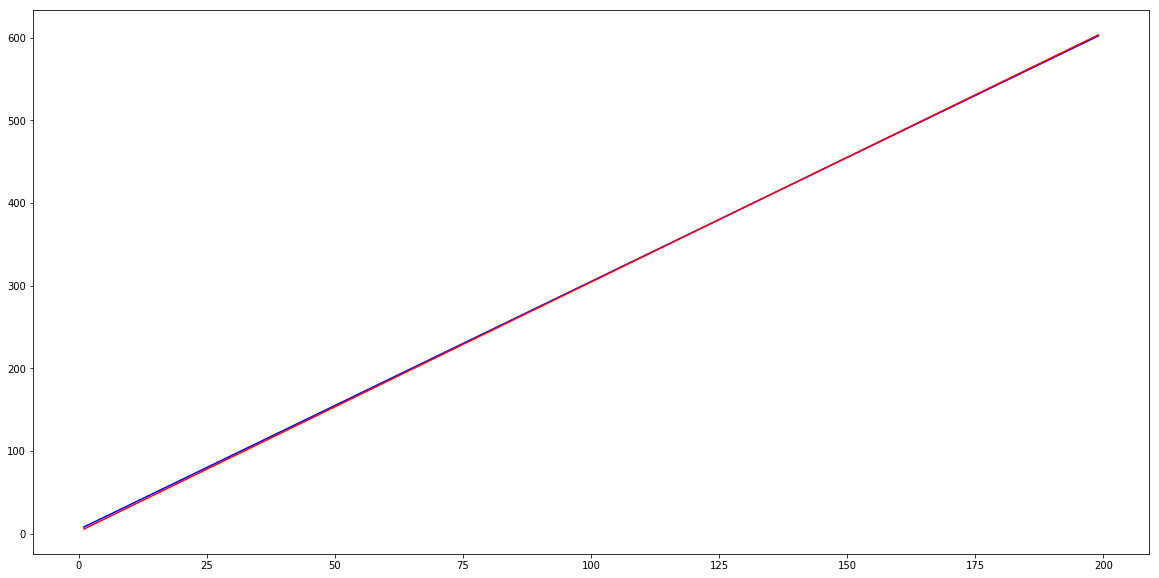

In [146]:
plt.figure(figsize=(20,10))
feature_matrix = setting_data(data=x)
predicted = predict_values(feature_matrix=feature_matrix, weights=learned_weights)
sns.lineplot(x=x[:,0],y=y,color='b')
sns.lineplot(x=x[:,0],y=predicted,color='r')